#                  PROJECT:  WRANGLING AND ANALYSIS

   ###                                                                          udacity alx_programme

   ###                                                                            email:emmamutegi97@gmail.com


 ## TABLE OF CONTENTS
                
1.  [Gather](#1.-Gather)

2.  [Accessing](#2.-Accessing)
         
3.  [Data Cleaning](#3.-Data-Cleaning)

4.  [Storing](#4.-Storing) 

5.  [Analyzing and Visualizing Data](#5.-Analyzing-and-Visualizing-Data)
        


## 1. Gather

In [2]:
""" importing packages i will use to wrangle and in this case pandas helps me to read dataframes
"""
import pandas as pd

In [3]:
"""loading twitter archive enhanced dataset
"""
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [8]:
"""method is used to show the first 2 rows of my loaded dataset
"""
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Gathering my image prediction file

In [9]:
""" this package allowes me to send HTTP requests using python
    OS is used to check if a folder exists and create a new one if it doesn't.
"""
import requests
import os

In [10]:
# Make a directory
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# this method sends a GET request to the specified url
response=requests.get(url)

In [11]:
"""Using the Response.content method and some basic file I/O to save this file to my computer
"""
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [12]:
#cheking the file saved
os.listdir(folder_name)

['image-predictions.tsv']

In [13]:

"""loading my tsv file
"""
image_preds=pd.read_csv('image-predictions.tsv',sep='\t')
#this method shows the first two rows in my dataset
image_preds

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Gathering tweet.json file

In [91]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 41


Success
882: 760521673607086080
Success
883: 760290219849637889
Success
884: 760252756032651264
Success
885: 760190180481531904
Success
886: 760153949710192640
Success
887: 759943073749200896
Success
888: 759923798737051648
Fail
889: 759846353224826880
Success
890: 759793422261743616
Success
891: 759566828574212096
Fail
892: 759557299618865152
Success
893: 759447681597108224
Success
894: 759446261539934208
Success
895: 759197388317847553
Success
896: 759159934323924993
Success
897: 759099523532779520
Success
898: 759047813560868866
Success
899: 758854675097526272
Success
900: 758828659922702336
Success
901: 758740312047005698
Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 7

Rate limit reached. Sleeping for: 78


Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
18

In [14]:
""" json helps us to work with JSON data
"""
import json

In [15]:
# creating an empty list
df_list = []
#loading my json file
with open('tweet-json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [16]:
df_list[0]    

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [17]:
""" this method creates a Dataframe from a list of Dictionaries
"""
df_tweet = pd.DataFrame(df_list, columns = ['id', 'retweet_count', 'favorite_count'])
# confirming whether it was a success
df_tweet

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## 2. Accessing

In [13]:
#displaying enhanced dataset
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [14]:
#this produces 5 random rows
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
680,788908386943430656,NaN,NaN,2016-10-20 01:03:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Lucy. She destroyed not one, but two r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/788908386...,11,10,Lucy,None,None,None,None
1343,704761120771465216,NaN,NaN,2016-03-01 20:11:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper killed this great white in an epic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704761120...,13,10,None,None,None,pupper,None
755,778748913645780993,NaN,NaN,2016-09-22 00:13:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Mya (pronounced ""mmmyah?""). Her head i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/778748913...,11,10,Mya,None,None,None,None
998,748307329658011649,NaN,NaN,2016-06-30 00:09:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This sherk must've leapt out of the water and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748307329...,7,10,None,None,None,None,None
426,821407182352777218,NaN,NaN,2017-01-17 17:21:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sundance. He's a doggo drummer. Even s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821407182...,14,10,Sundance,doggo,None,None,None


In [15]:
# this method produces more precise information of the dataset
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
# this method produces record for name label "a"
twitter_archive[twitter_archive.name=='a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [6]:
""" this method produces record where denominator is less than 1
"""
twitter_archive[twitter_archive.rating_denominator <= 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [7]:
""" this method produces record where numerator is greator than 20
"""
twitter_archive[twitter_archive.rating_numerator >= 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [17]:
""" this method produces duplicates of the given dataset
"""
sum(twitter_archive.duplicated())

0

In [18]:
"""cheking if any rows are missing any data
"""
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [19]:
# loading my tsv datset
image_preds

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [20]:
image_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_preds.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1484,781524693396357120,https://pbs.twimg.com/media/CtiIj0AWcAEBDvw.jpg,1,tennis_ball,0.994712,False,Chesapeake_Bay_retriever,0.003523,True,Labrador_retriever,0.000921,True
260,670783437142401025,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,1,lacewing,0.381955,False,sulphur_butterfly,0.106810,False,leafhopper,0.068347,False
1694,816091915477250048,https://pbs.twimg.com/media/C1NXQ6NXUAEAxIQ.jpg,3,Pomeranian,0.967345,True,Samoyed,0.007397,True,papillon,0.006017,True
1636,806242860592926720,https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg,2,Cardigan,0.593858,True,Shetland_sheepdog,0.130611,True,Pembroke,0.100842,True
519,676496375194980353,https://pbs.twimg.com/media/CWNl3S9WcAARN34.jpg,1,pug,0.985387,True,Norwegian_elkhound,0.004417,True,French_bulldog,0.003893,True
1831,836380477523124226,https://pbs.twimg.com/media/C5trm6iWgAQ22Hw.jpg,1,wooden_spoon,0.082489,False,sliding_door,0.061016,False,grand_piano,0.055086,False
483,675432746517426176,https://pbs.twimg.com/media/CV-ef64WoAAbh0I.jpg,1,Labrador_retriever,0.986548,True,golden_retriever,0.008862,True,Chihuahua,0.000694,True
398,673680198160809984,https://pbs.twimg.com/media/CVlkid8WoAAqDlB.jpg,1,Samoyed,0.989853,True,Arctic_fox,0.003344,False,chow,0.002802,True
1664,812466873996607488,https://pbs.twimg.com/media/C0Z2T_GWgAAxbL9.jpg,1,bath_towel,0.099804,False,pillow,0.092318,False,Great_Dane,0.078205,True
1954,864197398364647424,https://pbs.twimg.com/media/C_4-8iPV0AA1Twg.jpg,4,golden_retriever,0.945905,True,Labrador_retriever,0.021264,True,Tibetan_mastiff,0.020493,True


In [22]:
""" this method produces duplicates recors of the given dataset
"""
sum(image_preds.duplicated())

0

In [23]:
""" this method produces duplicates of the given dataset
"""
sum(df_tweet.duplicated())

0

In [24]:
#displaying df tweet dataframe
df_tweet

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [25]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Quality issues

### twitter_archive
- twitter-archive missing values
- wrong dtype for timestamp  which should be datetime in twitter archive
- wrong naming "a" is not the actual the name from text given
- puppo|pupper|floofer|doggo as one column named dog stage
- some rows in rating denominator have base less than 10
- remove any post that does not have images twitter archive dataset
- source name should be away from hyperlinks and tags 
- tweet id int and should be str
- source should define away from hyperlinks
### Image_preds
- some columns in image-preds don't have well defined names
- inconsistent naming of predictions where some start with uppercase while others is lowercase
- tweet id is int and should be str
### df_tweets
- renaming id column in df_tweets dataset in order to have consistent while merging
- tweet id is int and should be str

## Tidiness isssue

### twitter_archive
- numerator and denominator rating should be one column labeled ("ratings) in tweet_archive datset
### df_tweet
- puppo,pupper,floofer,doggo should be one column named dog stage



## 3. Data Cleaning

In [19]:
twitter_archive_clean = twitter_archive.copy()
image_preds_clean = image_preds.copy()
df_tweet_clean = df_tweet.copy()

In [20]:
all_columns = pd.Series(list(twitter_archive_clean) + list(image_preds_clean) + list(df_tweet_clean))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

## Definition
These columns listed below have NAN values which are of my concern and upon further scrutiny the data missing is over 90% which leave me with no option rather than dropping these columns:
- in_reply_to_status_id            **2278**
- in_reply_to_user_id              **2278**
- retweeted_status_id              **2175**
- retweeted_status_timestamp       **2175**
- retweeted_status_user_id         **2175**
- doggo, floofer, pupper, puppo



## Code

In [21]:
""" this method removes columns that will not be needed
"""
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_timestamp','retweeted_status_user_id'], axis=1, inplace=True)


## Test

In [22]:
twitter_archive_clean.sample(0)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**wrong dtype for timestamp which should be datetime in twitter archive**



## Definition:
Timestamp dtype should be converted to datetime

## Code

In [23]:
""" this method converts string to_datetime
"""
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

## Test

In [24]:

twitter_archive_clean.timestamp.dtypes

datetime64[ns, UTC]

## Define 
**By convectional columns names should be well defined,in my images_preds dataset some columns should be renamed:**
- img_num= imag_number
- p1= prediction1
- p1_conf= prediction1_confidence
- p1-dog= prediction1_dog
- p2= prediction2
- p2-conf=prediction2_confidence
- p2-dog= prediction2_dog
- p3= prediction3
- p3-conf=prediction3_confidence
- p3-dog= prediction3_dog


## Code

In [25]:
""" This methods renames columns
"""
image_preds_clean.rename(columns={"p1": "prediction1", "p1_conf": "prediction1_confidence", "p1_dog": "prediction1_dog", "p2": "prediction2", "p2_conf": "prediction2_confidence","p2_dog": "prediction2_dog", "p3": "prediction3", "p3_conf": "prediction3_confidence", "p3_dog": "prediction3_dog"}, inplace=True)

## Test

In [26]:
""" This for loop produces list of columns in a given dataset
"""
for col in image_preds_clean.columns:
    print(col)

tweet_id
jpg_url
img_num
prediction1
prediction1_confidence
prediction1_dog
prediction2
prediction2_confidence
prediction2_dog
prediction3
prediction3_confidence
prediction3_dog


### naming of  should be consistent where all should be in lowercase or uppercase

## Define
Naming in the predictions columns consist of lowercase and upper caseand this should be changed to a uniform lowercase

## Code

In [27]:
""" This method converts variables in these columns to lowercase
"""
image_preds_clean['prediction1'] = image_preds_clean['prediction1'].str.lower()
image_preds_clean['prediction2'] = image_preds_clean['prediction2'].str.lower()
image_preds_clean['prediction3'] = image_preds_clean['prediction3'].str.lower()


## Test

In [28]:
list(image_preds_clean.prediction2)

['collie',
 'miniature_pinscher',
 'malinois',
 'redbone',
 'rottweiler',
 'english_springer',
 'mud_turtle',
 'tibetan_mastiff',
 'shopping_basket',
 'komondor',
 'tibetan_mastiff',
 'yorkshire_terrier',
 'english_foxhound',
 'bull_mastiff',
 'german_shepherd',
 'shih-tzu',
 'newfoundland',
 'cock',
 'desk',
 'toy_terrier',
 'toy_poodle',
 'otter',
 'newfoundland',
 'chesapeake_bay_retriever',
 'siberian_husky',
 'skunk',
 'afghan_hound',
 'toy_terrier',
 'bloodhound',
 'barracouta',
 'papillon',
 'cocker_spaniel',
 'chow',
 'irish_terrier',
 'chain_saw',
 'beagle',
 'giant_schnauzer',
 'labrador_retriever',
 'pembroke',
 'english_springer',
 'beagle',
 'chihuahua',
 'cocker_spaniel',
 'miniature_pinscher',
 'weimaraner',
 'slug',
 'brittany_spaniel',
 'standard_schnauzer',
 'teddy',
 'toy_poodle',
 'armadillo',
 'chain_saw',
 'rottweiler',
 'african_hunting_dog',
 'labrador_retriever',
 'vizsla',
 'doormat',
 'pug',
 'italian_greyhound',
 'chihuahua',
 'samoyed',
 'pomeranian',
 'min

## Renaming id column in df_tweets dataset in order to have consistent while merging 

## Define
Merging more than one dataset in one common or duplicated column requires the columns to have the same naming inorder not to raise questions on matter of axis not found due quality issue

## Code

In [29]:
""" This method replaces id name with tweet_id
"""
df_tweet_clean = df_tweet_clean.rename(columns={'id': 'tweet_id'})

## Test

In [30]:
# displaying the 1st two rows
df_tweet_clean.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


### In the the rating denominator column some rating are not to base 10

## Define
we should replace them with 10 using replace method

## Code

In [31]:
#  this method replace values in denominator column that don't have a base of 10 with ten
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.replace( range(0,1000) , 10 ) 

## Test

In [32]:
twitter_archive_clean.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

## To meet requirements of this project one has only to have post that images

## Define

**Remove tweeta_id tweet_id posts in twitter_archive that don't have images as per the image preds datset**

## Code

In [33]:
""" this method displays tweet_id post that don't have images
"""
none_image = (~twitter_archive_clean.tweet_id.isin(list(image_preds_clean.tweet_id)))
none_image.sum()

281

In [34]:
""" This method removes tweet_ids that don't align with images dataset
"""
twitter_archive_clean = twitter_archive_clean[~none_image]

## Test

In [35]:
""" this method displays total tweet_ids that don't have images
"""
(~twitter_archive_clean.tweet_id.isin(list(image_preds.tweet_id))).sum()

0

### wrong data type for timestamp

## Define
Timestamp dytpe should be changed, using to_datetime method

## Code

In [36]:
""" This method convert timestamp to datetime
"""
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

## Test

In [37]:
# This method diplsys dtypes of timestamp
twitter_archive_clean.timestamp.dtype

datetime64[ns, UTC]

## tweet id for the 3 dataframes is dytpes int while it should be str

## Define
Convert dtypes to str thro astype method

In [38]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
image_preds_clean.tweet_id = image_preds_clean.tweet_id.astype(str)
df_tweet_clean.tweet_id = df_tweet_clean.tweet_id.astype(str)

## Test

In [39]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2075 non-null   object             
 1   timestamp           2075 non-null   datetime64[ns, UTC]
 2   source              2075 non-null   object             
 3   text                2075 non-null   object             
 4   expanded_urls       2075 non-null   object             
 5   rating_numerator    2075 non-null   int64              
 6   rating_denominator  2075 non-null   int64              
 7   name                2075 non-null   object             
 8   doggo               2075 non-null   object             
 9   floofer             2075 non-null   object             
 10  pupper              2075 non-null   object             
 11  puppo               2075 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

In [40]:
image_preds_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                2075 non-null   object 
 1   jpg_url                 2075 non-null   object 
 2   img_num                 2075 non-null   int64  
 3   prediction1             2075 non-null   object 
 4   prediction1_confidence  2075 non-null   float64
 5   prediction1_dog         2075 non-null   bool   
 6   prediction2             2075 non-null   object 
 7   prediction2_confidence  2075 non-null   float64
 8   prediction2_dog         2075 non-null   bool   
 9   prediction3             2075 non-null   object 
 10  prediction3_confidence  2075 non-null   float64
 11  prediction3_dog         2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [41]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


##  tweet source should be a name away from the hyperlinks

## Define
Getting tweet source only apart from wittout HTML hyperlinks and tags by using str.split

## Code

In [42]:
twitter_archive_clean['source_name'] = twitter_archive_clean.source.str.split('>', expand=True)[1].str.split('<', expand=True)[0]
twitter_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_name
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,Twitter for iPhone
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,Twitter for iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,Twitter for iPhone
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,Twitter for iPhone
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,Twitter for iPhone
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None,Twitter for iPhone


In [43]:
twitter_archive_clean.drop(['source'],axis=1, inplace=True)

In [44]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_name
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,Twitter for iPhone


## Test

In [45]:
""" This method showa sorted unique values
"""
twitter_archive_clean.source_name.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'],
      dtype=object)

# Tideness


### numerator and denominator rating should be one column labeled ("ratings) in tweet_archive datset

## Define
**numerator and denominator ratings should be in one column named ratings and first I will changing the colmns dtypes using astype method**

## Code

In [46]:
""" This method convert int into str 
"""
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(str)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(str)

In [47]:
""" This method combines two columns to one lablled ratings
"""
twitter_archive_clean['ratings'] = twitter_archive_clean[['rating_numerator', 'rating_denominator']].agg('/'.join, axis=1)
twitter_archive_clean.drop(['rating_numerator','rating_denominator'], axis=1, inplace=True)

## Test

In [48]:
""" this method produces ratings of our dataset
"""
twitter_archive_clean.ratings

0       13/10
1       13/10
2       12/10
3       13/10
4       12/10
        ...  
2351     5/10
2352     6/10
2353     9/10
2354     7/10
2355     8/10
Name: ratings, Length: 2075, dtype: object

### puppo|pupper|doggo|floofer should be in one column

## Define
 There should be a column named dog stage that will combine all the stages using str.extract method

## Code

In [49]:
""" This method extracts dog stages from text and name them in one column
"""
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
twitter_archive_cleane =twitter_archive_clean.drop(columns=['doggo','floofer','pupper','puppo'])

In [50]:
twitter_archive_clean.drop(columns=['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

## Test

In [51]:
twitter_archive_clean['dog_stage'].value_counts()

pupper     231
doggo       75
puppo       29
floofer      3
Name: dog_stage, dtype: int64

# Merging dataframes

## code

In [52]:
""" This method joins twitter archive dataset to image-preds dataset
"""
twitter_archive_master=pd.merge(twitter_archive_clean, image_preds_clean, on="tweet_id")

In [53]:
""" merging df_tweet to the other two
"""
twitter_archive_master=pd.merge(twitter_archive_master,df_tweet_clean, on='tweet_id')

## Test

In [54]:
""" This method produces the columns of my dataset
"""
list(twitter_archive_master)

['tweet_id',
 'timestamp',
 'text',
 'expanded_urls',
 'name',
 'source_name',
 'ratings',
 'dog_stage',
 'jpg_url',
 'img_num',
 'prediction1',
 'prediction1_confidence',
 'prediction1_dog',
 'prediction2',
 'prediction2_confidence',
 'prediction2_dog',
 'prediction3',
 'prediction3_confidence',
 'prediction3_dog',
 'retweet_count',
 'favorite_count']

# 4. Storing

# saving master dataframe

In [55]:
""" Here the method saves my cleaned dataframe
"""
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

In [56]:
""" Loading my dataset
"""
df = pd.read_csv('twitter_archive_master.csv')

# 5. Analyzing and Visualizing Data

In [59]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Alogarithms confidence in prediction

In [57]:
""" This method produces the mean of each column
"""
df.prediction1_confidence.mean(), df.prediction2_confidence.mean(), df.prediction3_confidence.mean()

(0.5945316507477092, 0.13466650912364342, 0.060340045577699446)

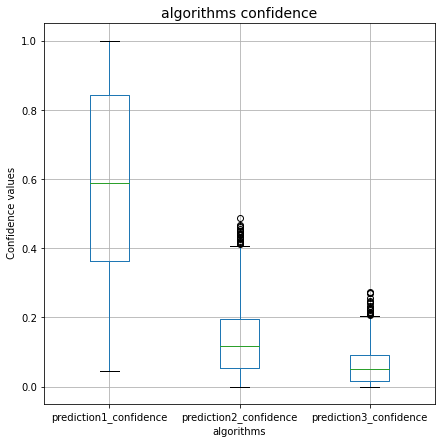

In [61]:
boxplot = df.boxplot(column=['prediction1_confidence', 'prediction2_confidence', 'prediction3_confidence'], figsize=(7,7)) 
plt.title("algorithms confidence", fontsize=14)
plt.ylabel(" Confidence values")
plt.xlabel("algorithms");

## Insights
- **Of the three, prediction1 have a higher confidence level while prediction3 has the lowest**


- **Prediction2 and prediction3 have outliers which mean during of fitting  of these algorithms with data or images they         "overperformed" as well "underperforming" in relation to where the bulk of the rest data was.**


- **prediction1_confidence is left skewed and prediction2 and prediction3 are right skewed**

# Distribution of dog stages

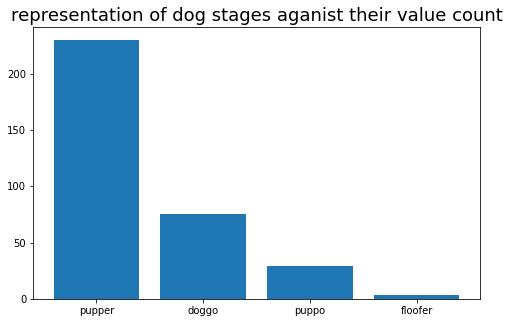

In [62]:
plt.figure(figsize=(8,5))
plt.title("representation of dog stages aganist their value count", fontsize=18)
plt.xlabel=("Dog stages")
plt.ylabel=('Value counts')
plt.bar(x=df['dog_stage'].value_counts().index,
        height=df.dog_stage.value_counts().values);



## Insights

- **From the histogram above pupper seems to be high owned dog and this can be attributed to how they are calm and are in training stages thus more friendly compared to floofer which is list owned (big dog)**


- **Demand of stages dogs decreases with increase in age of the dog from pupper to floofer**


- **People in general will invest and spend more on pupper dogs than any other stage** 

## Dog stage popurality in respect to retweet and favorite counts and their sources

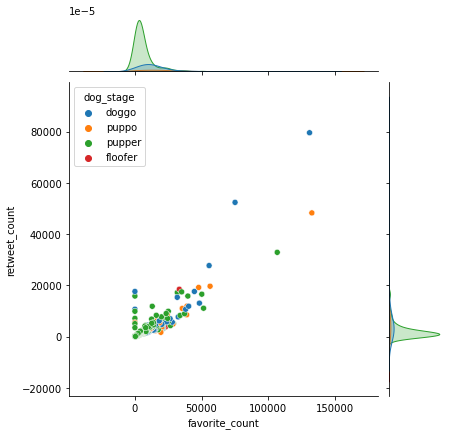

In [114]:
sns.jointplot(x='favorite_count',y='retweet_count',data=df,kind='scatter',hue='dog_stage');

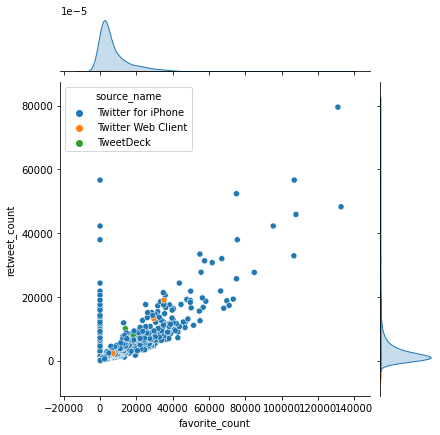

In [122]:
sns.jointplot(x='favorite_count',y='retweet_count',data=df,kind='scatter',hue=df['source_name']);


## Insights
- **doggo had the highest retweet and favorite count for a certain tweet from the visualization above**
- **There is a strong|positive|linear with gap relationship among the various dog stages**
- **Most people tweeted using iphone indicating that the most valued gadget is iphone among dog lovers in our data**